# **Data Wrangling - Netflix Project**
By: Shahad Alsulami

## **Table of Contents**
<ul>

<ul>
  <li><a href="#intro">Introduction</a></li>
  <li><a href="#gather">Gathering Data</a></li>
  <li><a href="#asses">Assessing Data</a></li>
  <li><a href="#clean">Cleaning Data</a></li>
  <li><a href="#store">Storing and Combining datasets</a></li>
  <li><a href="#vis">Visualizing and Answering Questions</a></li>
  <li><a href="#ref">Reflection</a></li>
</ul>

</ul>

## **1. Introduction**


> The purpose of this project is to apply the skills I learned in the Advanced Data Wrangling section of the **Udacity Data Analyst Nanodegree** program

### Datasets Description 

> These datasets contain information about movies and shows from Netflix and other sources. They include details like titles, release years, actors, genres, and popularity. This data helps to understand trends and patterns in the available entertainment content

### Questions for Analysis
> What are the main trends and factors influencing Netflix content ?  
> **Q1**: Who are the top 10 actors with the most appearances in Netflix shows?    
> **Q2**: How many titles are shared between Netflix and other movies?  
> **Q3**: How were Netflix releases affected during 2020 and 2021 compared to previous years?

In [905]:
# Import all packages 
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval

<a id="gather"></a>
## **2. Gathering Data**

> In this section, I will show two different approaches to loading datasets during the data‑gathering phase.  
1- Movies dataset  
2- Netflix dataset

#### **1-Movies Dataset**
I will load movie data from a local CSV file using **pandas.read_csv()**

**Dataset variables:**  
**adult** - Indicates whether the movie is for adults  
**genres** - The genres associated with the movie    
**homepage** - The official website of the movie   
**id** - Unique identifier for each movie in the dataset   
**original_language** - The language of the movie    
**original_title** - The original title of the movie   
**popularity** - A measure of the movie's popularity    
**release_date** - The date when the movie was released    
**revenue** - The total revenue generated by the movie   
**runtime** - The duration of the movie in minutes   
**title** - The title of the movie   

In [1083]:
# load data and view out a few lines
movies_df=pd.read_csv('movies_metadata.csv')
pd.set_option('display.max_columns', None)
movies_df.head()

C:\Users\Shahad\AppData\Local\Temp\ipykernel_18168\506576457.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df=pd.read_csv('movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


#### **2-Netflix Dataset**
I will load a CSV dataset of Netflix movies and shows using **Kaggle API**

**Dataset variables:**   
**show_id** - Unique identifier for each show  
**type** - The type of the content, indicating whether it's a movie or a TV show   
**title** - The title of the show  
**cast** - The main actors and actresses in the show  
**release_year** - The year the show was first released   
**description** - A brief summary of the show's plot or main theme    

In [924]:
# Make kaggle folder
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

# Copy kaggle.json to kaggle
shutil.copy('kaggle.json', os.path.expanduser('~/.kaggle/kaggle.json'))

# Download and unzip Netflix data
!kaggle datasets download -d shivamb/netflix-shows -p ./netflix --unzip

# Check files in netflix folder
os.listdir('./netflix')

Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
netflix-shows.zip: Skipping, found more recently modified local copy (use --force to force download)


['netflix-shows.zip',
 'netflix_titles--.csv',
 'netflix_titles-.csv',
 'netflix_titles.csv']

In [1508]:
# load data and view out a few lines
netflix_df = pd.read_csv('./netflix/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## **Creating backup copies**
> Before modifying or cleaning the original datasets, it’s important to create backups to have the raw data

In [336]:
# Create backup copies before cleaning
movies_df_raw = movies_df.copy()
netflix_df_raw = netflix_df.copy()

movies_df_raw.to_csv('movies_df_raw.csv', index=False)
netflix_df_raw.to_csv('netflix_df_raw.csv', index=False)

<a id='asses'></a>
## **3. Assessing Data**

> In this section, I will assess data quality and tidiness visaullay and programmatically

### **Data Quality issues with movies table**

- #### Assessing data visually

> I visually assessed the dataset using functions like **head()**, **info()** to get an overview of the data, I noticed that some columns has missing values, inconsistent, and incorrect data types

- #### Assessing data programmatically

In [1066]:
# Display the first 5 rows
movies_df.head()

,adult,genres,homepage,id,original_language,original_title,popularity,release_date,revenue,runtime,title,source
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Toy Story,other_movies
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,Jumanji,17.015539,1995-12-15,262797249.0,104.0,Jumanji,other_movies
2,False,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,Grumpier Old Men,11.7129,1995-12-22,0.0,101.0,Grumpier Old Men,other_movies
3,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,Waiting to Exhale,3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,other_movies
4,False,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Father of the Bride Part II,8.387519,1995-02-10,76578911.0,106.0,Father of the Bride Part II,other_movies


In [387]:
# Display the number of rows and columns
movies_df.shape

(45466, 11)

In [714]:
# Display a summary of the DataFrame
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [1068]:
# Check how many different data types exist in each column
movies_df.applymap(type).nunique()

C:\Users\Shahad\AppData\Local\Temp\ipykernel_18168\3117208407.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  movies_df.applymap(type).nunique()


adult                1
genres               1
homepage             2
id                   1
original_language    2
original_title       1
popularity           2
release_date         2
revenue              1
runtime              1
title                2
source               1
dtype: int64

During initial inspection, I found:

**Inconsistent datatypes** for:
  `popularity`
  `title`
  `release_date`

**Missing values** in:
  `popularity`
  `revenue`
  `title`
  `release_date`


In [391]:
# Count how many different data types exist
movies_df['popularity'].apply(type).value_counts()

popularity
<class 'float'>    32769
<class 'str'>      12697
Name: count, dtype: int64

The `popularity` column contains mixed data types (strings and floats)   
It will be cleaned by converting all values to numeric using `pd.to_numeric()` with `errors='coerce'`,  
which will convert any invalid strings to NaN and then filling these missing values with the mean

In [987]:
# Count how many different data types exist
movies_df['title'].apply(type).value_counts()

title
<class 'str'>      45460
<class 'float'>        6
Name: count, dtype: int64

The `tilte` column contains mixed data types (strings and floats)   
It will be cleaned by converting all non-string values to NaN and then filling these missing values with the string "unknown"

In [395]:
# Count how many different data types exist
movies_df['release_date'].apply(type).value_counts()

release_date
<class 'str'>      45379
<class 'float'>       87
Name: count, dtype: int64

The `release date` column contains mixed data types (strings and floats)      
It will be cleaned by converting all values to datetime using `pd.to_datetime()` with `errors='coerce'`  
which will convert invalid entries to `NaT`

In [397]:
# Count the number of missing values 
movies_df['popularity'].isna().sum()

5

In [980]:
# Count the number of missing values 
movies_df['revenue'].isna().sum()

6

In [982]:
# Count the number of missing values 
movies_df['title'].isna().sum()

6

In [984]:
# Count the number of missing values 
movies_df['release_date'].isna().sum()

87

In [405]:
# Display summary statistics
movies_df['revenue'].describe()

count    4.546000e+04
mean     1.120935e+07
std      6.433225e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

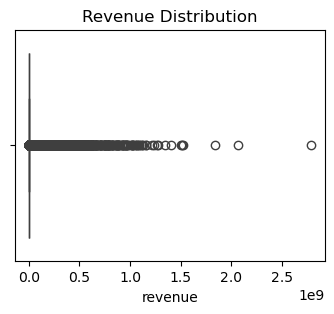

In [407]:
# Create a box plot to visualize the distribution of the 'revenue' column
plt.figure(figsize=(4, 3))
sns.boxplot(x=movies_df['revenue'])
plt.title('Revenue Distribution')
plt.show()

It was discovered that the revenue column contains a significant number of zeros, which are considered non-logical values in this context.
Although zero revenue might be valid in some cases, the high frequency of zeros suggests that many actually represent missing data.
Therefore, during the cleaning phase, zero values will be replaced with np.nan to mark them as missing using `NumPy`

In [409]:
# Count the number of duplicate rows
movies_df.duplicated().sum()

13

These duplicate rows will be removed to maintain data accuracy and avoid bias in the analysis

### **Data Quality issues with netflix table**

- #### Assessing data visually

> I visually assessed the dataset using functions like **head()**, **info()** to get an overview of the data,I noticed that some columns has missing values, inconsistent, and incorrect data types.

- #### Assessing data programmatically

In [564]:
# Display the first 5 rows
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [929]:
# Display the number of rows and columns
netflix_df.shape

(8807, 12)

In [903]:
# Display a summary of the DataFrame
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [411]:
# Count the number of missing values 
netflix_df.isna().sum()

show_id           0
type              0
title             0
cast            825
release_year      0
description       0
dtype: int64

In [413]:
# Check how many different data types exist in each column
netflix_df.applymap(type).nunique()

C:\Users\Shahad\AppData\Local\Temp\ipykernel_18168\1052603809.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  netflix_df.applymap(type).nunique()


show_id         1
type            1
title           1
cast            2
release_year    1
description     1
dtype: int64

During initial inspection, I found:  
**Inconsistent datatypes and Missing values** for: `cast`

In [415]:
# Count how many different data types exist
netflix_df['cast'].apply(type).value_counts()

cast
<class 'str'>      7982
<class 'float'>     825
Name: count, dtype: int64

The `cast` column contains mixed data types (strings and floats).  

In [417]:
# Count the number of missing values 
netflix_df['cast'].isna().sum()

825

Missing values in the cast column will be filled using the fillna() method with the value "unknown"

In [579]:
# Count the number of duplicate rows
netflix_df.duplicated().sum()

0

There are no duplicated rows

### **Data Tidiness issues with movie table**

- #### Assessing data visually

> I visually assessed the dataset using **head()** and noticed that the genres column contains multiple values in a single cell

- #### Assessing data programmatically

In [726]:
# Display the first 5 rows
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


The `genres` column contains values formatted as lists of dictionaries, each representing a genre with an ID and name. This nested structure is not suitable for analysis and will be cleaned later by extracting only the genre names for easier visualization.  

### **Data Tidiness issues with netflix table**

- #### Assessing data visually

> I visually assessed the dataset using **head()** and noticed that the duration column has 2 types of information

- #### Assessing data programmatically

In [751]:
# Display the first 5 rows
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


The `duration` column contains mixed types of information (length and unit) within a single column, and it will be cleaned later by separating the numeric values from the units to ensure accurate analysis

## **4. Cleaning Data**
> I will clean the data to fix quality and tidiness issues found during assessment.

### **Quality Issue 1: Movies Table**

#### **1-Popularity Column**  

The `popularity` column contains mixed data types (strings and floats).  
It will be cleaned by converting all values to numeric using `pd.to_numeric()` with `errors='coerce'`,  
which will convert any invalid strings to NaN and then filling these missing values with the mean  
and the few missing values in the `popularity` column will be filled using the column's mean

In [1085]:
# Convert popularity column to numeric values only
movies_df['popularity'] = pd.to_numeric(movies_df['popularity'], errors='coerce')

**Test:**

In [1087]:
# Check the data types after conversion
movies_df['popularity'].apply(type).value_counts()

popularity
<class 'float'>    45466
Name: count, dtype: int64

In [1089]:
# Fill missing values with the column mean
movies_df['popularity'] = movies_df['popularity'].fillna(movies_df['popularity'].mean())

**Test:**

In [1091]:
# Validate the cleaning was successful
movies_df['popularity'].isna().sum()

0

**Justification:**  
I converted the popularity column from containing both strings and numbers to numeric values only using pd.to_numeric, coercing invalid strings to NaN, then filled the missing values with the mean to ensure data consistency and completeness

#### **2-Title Column**  
consistency and Completeness  

The `tilte` column contains mixed data types (strings and floats)  
It will be cleaned by converting all values to string and then filling missing values with the string "unknown".

In [1093]:
# convert all values to strings and replace missing values with 'unknown'
movies_df['title'] = movies_df['title'].apply(lambda x: str(x) if pd.notnull(x) else 'unknown')

**Test:**

In [1095]:
# Check the data types after conversion
movies_df['title'].apply(type).value_counts()

title
<class 'str'>    45466
Name: count, dtype: int64

In [1097]:
# Validate the cleaning was successful
movies_df['title'].isna().sum()

0

**Justification:**  
I converted the title column, which contained both strings and numbers, to contain only string values, and then filled missing values with the string "unknown" to ensure data consistency and completeness.

#### **3-Release Date Column**  

The `release date` column contains both strings and floats.  
It will be cleaned by converting all values to datetime using `pd.to_datetime()` with `errors='coerce'`  
which will convert invalid entries to `NaT`, and keeping the NaT values helps show which dates are missing or wrong and keeps the column as datetime for easy and accurate analysis.

In [1099]:
# Change the 'release_date' column to datetime and wrong dates become missing values (NaT)
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

**Test:**

In [1101]:
# Check the data types after conversion
movies_df['release_date'].apply(type).value_counts()

release_date
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    45376
<class 'pandas._libs.tslibs.nattype.NaTType'>            90
Name: count, dtype: int64

**Justification:**  
I converted the release_date column to datetime format to ensure all dates are consistent. Any invalid or unrecognizable dates were automatically set to **NaT** to mark them as missing values

#### **4-Revenue Column**  

The `revenue` column contains many zeros, which likely represent missing values.
To handle this, zeros will be replaced with np.nan using NumPy

In [1103]:
# Replace zero values in the 'revenue' column with np.nan to mark them as missing data
movies_df['revenue'] = movies_df['revenue'].replace(0, np.nan)

In [439]:
movies_df['revenue'].describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

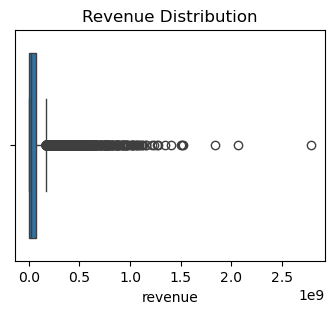

In [441]:
# Create a box plot to visualize the distribution of the 'revenue' column
plt.figure(figsize=(4, 3))
sns.boxplot(x=movies_df['revenue'])
plt.title('Revenue Distribution')
plt.show()

**Justification:**   
After replacing zero values with np.nan, the revenue distribution became more realistic.
This improved the accuracy of the analysis and made the boxplot more meaningful

#### **5-Duplicated Column**  
There are duplicated rows will be removed to ensure data accuracy

In [1105]:
# Remove duplicate rows
movies_df.drop_duplicates(inplace=True)

**Test:**

In [1107]:
# Validate the cleaning was successful 
movies_df.duplicated().sum()

0

**Justification:**  
Duplicate rows were removed to keep the dataset clean and accurate

### **Quality Issue 2: Netflix Table**

#### **1-Cast Column**  

The `cast` column contains mixed data types (strings and floats)  
It will be cleaned by converting all values to string and then filling missing values with the string "unknown"

In [1543]:
# Convert all values to strings and replace missing values with 'unknown'
netflix_df['cast'] = netflix_df['cast'].apply(lambda x: str(x) if pd.notnull(x) else 'unknown')

**Test:**

In [1545]:
# Check the data types after conversion
netflix_df['cast'].apply(type).value_counts()

cast
<class 'str'>    8807
Name: count, dtype: int64

In [1547]:
netflix_df['cast'].isna().sum()

0

**Justification:**  
I converted the cast column, which contained both strings and numbers, to contain only string values, and then filled missing values with the string "unknown" to ensure data consistency and completeness

### **Tidiness Issue 1: Movies Table**

#### **1-Genres Column**  

The `genres` column contains values formatted as lists of dictionaries.This nested structure is not suitable for direct analysis and will be cleaned  by extracting only the genre names for easier processing and visualization.  


In [1196]:
# Extract genre names from string; replace NaN with empty list
movies_df['genres'] = movies_df['genres'].apply(
    lambda x: [genre['name'] for genre in literal_eval(x)] if pd.notnull(x) else []
)

**Test:**

In [1197]:
# Display the first 5 values of the 'genres' column to preview the cleaned data 
movies_df['genres'].head()

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genres, dtype: object

**Justification:**  
I extracted the genre names to simplify the data and made missing values empty lists to avoid errors and keep the dataset clean for analysis

### **Tidiness Issue 2: Netflix Table**

#### **1- Duration column**
The `duration` column contains mixed types of information (length and unit) within a single column, and it will be cleaned by separating the numeric values from the units to ensure accurate analysis

In [1535]:
# Separate value and unit from the duration column
netflix_df[['duration_value', 'duration_unit']] = netflix_df['duration'].str.extract(r'(\d+)\s*(\w+)')

# Change duration_value to number
netflix_df['duration_value'] = pd.to_numeric(netflix_df['duration_value'], errors='coerce')

**Test:**

In [1549]:
netflix_df.head()

,show_id,type,title,cast,release_year,duration,description,duration_value,duration_unit
0,s1,Movie,Dick Johnson Is Dead,unknown,2020,90 min,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021,2 Seasons,"After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021,1 Season,To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,unknown,2021,1 Season,"Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021,2 Seasons,In a city of coaching centers known to train I...,2.0,Seasons


**Justification:**  
I separated the duration into numeric values and units to avoid errors and keep the dataset clean for analysis

## **Remove unnecessary variables**

#### **Remove unnecessary variables for movies table**

In [1113]:
# Remove unnecessary variables
movies_df.drop(columns=['belongs_to_collection','budget', 'imdb_id','overview', 'poster_path','production_companies', 'production_countries',
                     'spoken_languages', 'status', 'tagline', 'video', 'vote_average', 'vote_count'], inplace=True)

**Test:**

In [1331]:
# Display the first 5 rows
movies_df.head()

,adult,genres,homepage,id,original_language,original_title,popularity,release_date,revenue,runtime,title,source
0,False,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Toy Story,other_movies
1,False,"[Adventure, Fantasy, Family]",NaN,8844,en,Jumanji,17.015539,1995-12-15,262797249.0,104.0,Jumanji,other_movies
2,False,"[Romance, Comedy]",NaN,15602,en,Grumpier Old Men,11.712900,1995-12-22,NaN,101.0,Grumpier Old Men,other_movies
3,False,"[Comedy, Drama, Romance]",NaN,31357,en,Waiting to Exhale,3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,other_movies
4,False,[Comedy],NaN,11862,en,Father of the Bride Part II,8.387519,1995-02-10,76578911.0,106.0,Father of the Bride Part II,other_movies


#### **Remove unnecessary variables for netflix table**

In [1514]:
# Remove unnecessary variables
netflix_df.drop(columns=['director', 'country', 'date_added', 'rating', 'listed_in'], inplace=True)

**Test:**

In [1461]:
# Display the first 5 rows
netflix_df.head()

,show_id,type,title,cast,release_year,duration,description
0,s1,Movie,Dick Johnson Is Dead,NaN,2020,90 min,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021,1 Season,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,2021,1 Season,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021,2 Seasons,In a city of coaching centers known to train I...


## **5. Storing and Combining datasets**  

> After completing the data cleaning, I will save a copy of the cleaned dataset

In [837]:
# Save cleaned versions of the datasets after data cleaning
movies_df_cleaned = movies_df.copy()
netflix_df_cleaned = netflix_df.copy()

movies_df_cleaned.to_csv('movies_df_cleaned.csv', index=False)
netflix_df_cleaned.to_csv('netflix_df_cleaned.csv', index=False)

> I will merge both datasets into one

In [1471]:
# Merge Netflix and movies dataframes and view out a few lines
merged_df = pd.merge(netflix_df, movies_df, on='title', how='outer')
merged_df.head()

,show_id,type,title,cast,release_year,duration,description,adult,genres,homepage,id,original_language,original_title,popularity,release_date,revenue,runtime,source
0,NaN,NaN,!Women Art Revolution,NaN,NaN,NaN,NaN,False,[Documentary],http://www.womenartrevolution.com/,55245,en,!Women Art Revolution,0.077485,2010-01-01,NaN,83.0,other_movies
1,NaN,NaN,#1 Cheerleader Camp,NaN,NaN,NaN,NaN,False,"[Comedy, Drama]",NaN,41371,en,#1 Cheerleader Camp,1.190427,2010-07-27,NaN,95.0,other_movies
2,s2037,Movie,#Alive,"Yoo Ah-in, Park Shin-hye",2020.0,99 min,"As a grisly virus rampages a city, a lone man ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,s2305,Movie,#AnneFrank - Parallel Stories,"Helen Mirren, Gengher Gatti",2019.0,95 min,"Through her diary, Anne Frank's story is retol...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,s2482,Movie,#FriendButMarried,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",2018.0,102 min,"Pining for his high school crush for years, a ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


## **6.Visualizing and Answering Questions**
> In this section, I will use different charts and plots to explore the data and answer key questions about Netflix content trends, popular actors, and the impact of COVID-19 on releases. Visualization helps to better understand the patterns and insights hidden in the data

### **Q1: Who are the top 10 actors with the most appearances in Netflix shows?**

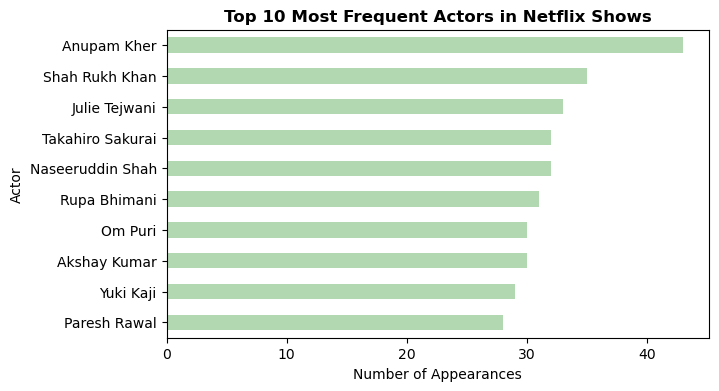

In [1413]:
# Split actor names by comma and explode into separate rows
all_actors = netflix_df['cast'].str.split(',').explode()

# Remove unknown values
all_actors = all_actors[all_actors != 'unknown']

# Count the number of appearances for each actor and get the top 10
top_actors = all_actors.value_counts().head(10)

# Plot a horizontal bar chart of the top 10 most frequent actors
plt.figure(figsize=(7,4))
top_10.sort_values().plot(kind='barh', alpha=0.3, color='green')
plt.xlabel('Number of Appearances')
plt.title('Top 10 Most Frequent Actors in Netflix Shows', weight='bold')
plt.show()

The chart shows the top 10 actors who appear most often in Netflix shows.
These actors show up in many Netflix titles, which could mean they are popular, work with Netflix a lot, or star in long-running series.

### **Q2: How many titles are shared between Netflix and other movies?**

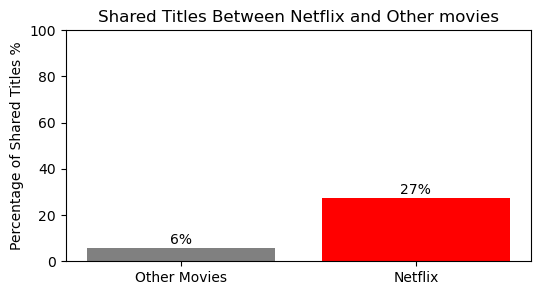

In [1411]:
# Netflix titles set
netflix_titles = set(netflix_df['title'])

# Other movies titles set
movies_titles = set(movies_df['title'])

# Find shared titles between Netflix and other movies
shared_titles = netflix_titles & movies_titles

# Calculate the percentage
netflix_percent = len(shared_titles) / len(netflix_titles) * 100
movies_percent = len(shared_titles) / len(movies_titles) * 100

# Create bar chart
plt.figure(figsize=(6, 3))
plt.bar(['Other Movies', 'Netflix'], [movies_percent, netflix_percent], color=['grey', 'red'])
plt.ylabel('Percentage of Shared Titles %')
plt.title('Shared Titles Between Netflix and Other movies')
plt.ylim(0, 100)

# Add percentage labels above the bars
for i, val in enumerate([movies_percent, netflix_percent]):
    plt.text(i, val + 2, f"{round(val)}%", ha='center')

plt.show()

- 27% of Netflix titles are also found in other movies.

- 6% of other movies’ titles are found on Netflix.

Netflix mostly offers original and exclusive content, which makes it stand out from other movies


### **Q3: How were Netflix releases affected during 2020 and 2021 compared to previous years?**

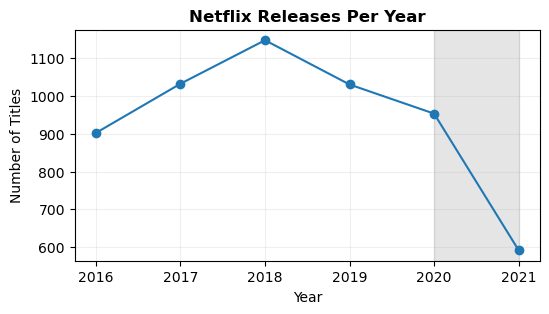

In [1299]:
# Filter Netflix data from 2016 onwards
netflix_filtered = netflix_df[netflix_df['release_year'] >= 2016]

# Count the number of titles per year
year_counts = netflix_filtered['release_year'].value_counts().sort_index()

# Create line chart
plt.figure(figsize=(6, 3))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.axvspan(2020, 2021, color='gray', alpha=0.2)
plt.title('Netflix Releases Per Year', weight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(alpha=0.2)
plt.show()

There is a noticeable decline in the number of Netflix titles released during the two years of the COVID-19 pandemic (2020 and 2021). This likely reflects the impact of production delays, shutdowns, and disruptions caused by the pandemic.

<a id="ref"></a>

## **7. Reflection**
> If I had more time, I would dedicate extra effort to improving data cleaning by addressing missing values, duplicates, and inconsistent formats more comprehensively. Furthermore, I’d like to explore additional research questions such as how Netflix content availability varies across different countries and how regional preferences influence the platform’s offerings.
